alle Covid kombinationen holen

wenn DE >= 3

DE / E berechnen

speichern 

Häufigkeitsdiagramm / Hist plot


In [33]:
from pymongo import MongoClient
import sys
sys.path.append('../statistical_calculations')  # Adds the statistical_calculations directory to the path
import disproportionaly_analysis
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

# Connect to your MongoDB instance
client = MongoClient('mongodb://localhost:27017/')
db = client['vaers']  
col = db['combinations']

In [8]:

'''query = {
    "vaccine": { "$regex": "COVID", "$options": "i" }
}'''

'query = {\n    "vaccine": { "$regex": "COVID", "$options": "i" }\n}'

### PFIZER

100%|██████████| 9886/9886 [00:00<00:00, 627239.01it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


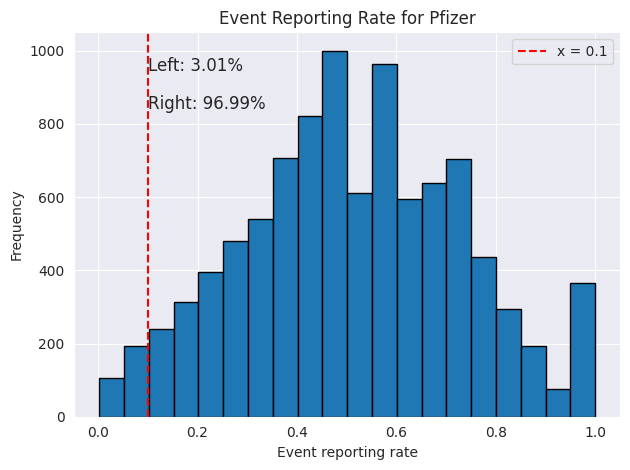

In [47]:
E_reporting_rate = []
symptom = []

query = {
    "vaccine": "COVID19",
    "manufacturer": "PFIZER\\BIONTECH",
}
results = list(col.find(query))

for result in tqdm(results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=20, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for Pfizer')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Pfizer_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Pfizer_Event_reporting_rate_analysis.png')
plt.show()


### MODERNA

100%|██████████| 7217/7217 [00:00<00:00, 739652.83it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


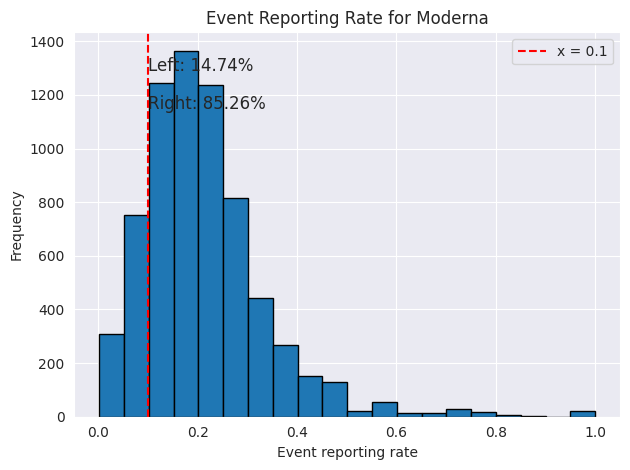

In [48]:
E_reporting_rate = []
symptom = []

query = {
    "vaccine": "COVID19",
    "manufacturer": "MODERNA",
}
results = list(col.find(query))

for result in tqdm(results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=20, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for Moderna')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Moderna_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Moderna_Event_reporting_rate_analysis.png')
plt.show()


### JANSSEN

100%|██████████| 3674/3674 [00:00<00:00, 500044.55it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


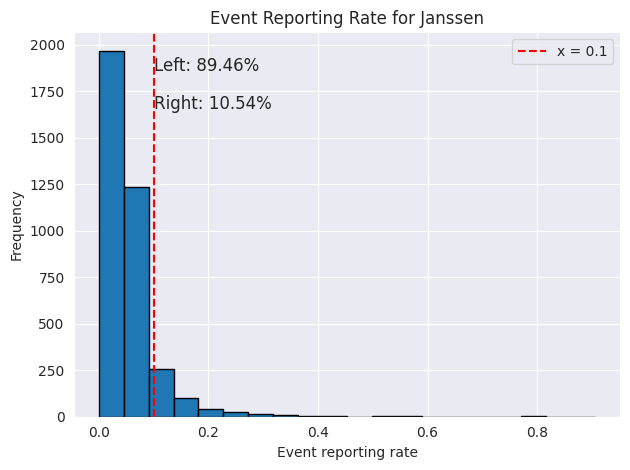

In [49]:
E_reporting_rate = []
symptom = []

query = {
    "vaccine": "COVID19",
    "manufacturer": "JANSSEN"
}
results = list(col.find(query))

for result in tqdm(results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=20, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for Janssen')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/JANSSEN_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/JANSSEN_Event_reporting_rate_analysis.png')
plt.show()


### NOVAVAX

100%|██████████| 159/159 [00:00<00:00, 238859.00it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


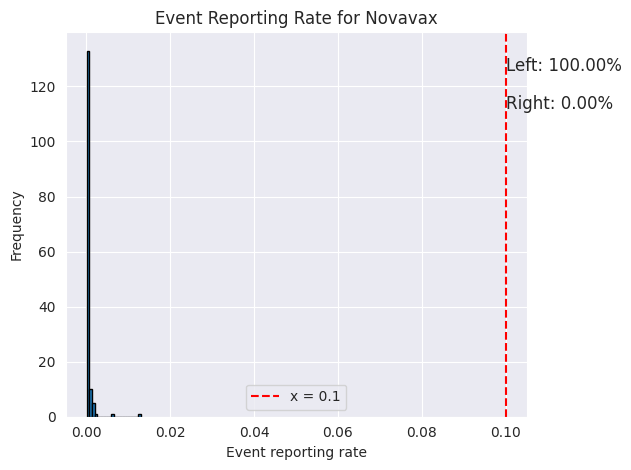

In [59]:
E_reporting_rate = []
symptom = []

query = {
    "vaccine": "COVID19",
    "manufacturer": "NOVAVAX"
}
results = list(col.find(query))

for result in tqdm(results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=20, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for Novavax')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/NOVAVAX_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/NOVAVAX_Event_reporting_rate_analysis.png')
plt.show()


### for all Covid vaccines

100%|██████████| 22280/22280 [00:00<00:00, 545614.86it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


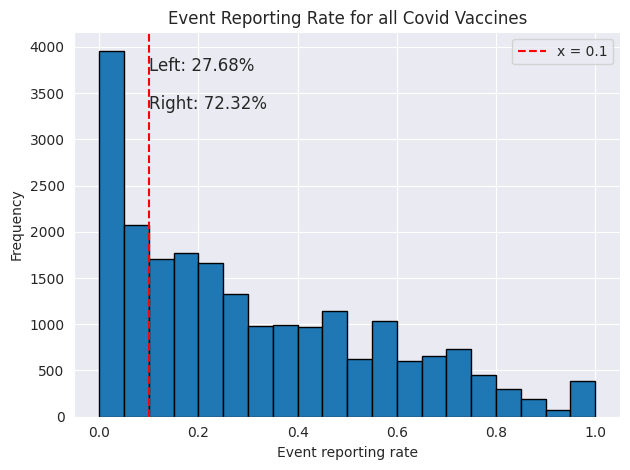

In [52]:
E_reporting_rate = []
symptom = []



query = {
    "vaccine": "COVID19",
}
results = list(col.find(query))
for result in tqdm(results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=20, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for all Covid Vaccines')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/All_Covid_vaccines_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/All_Covid_vaccines_Event_reporting_rate_analysis.png')
plt.show()


In [11]:
df[df['symptom'] == 'Heavy menstrual bleeding']

,symptom,E_rate
2934,Heavy menstrual bleeding,0.184604
5060,Heavy menstrual bleeding,0.002390
7491,Heavy menstrual bleeding,0.769735
7719,Heavy menstrual bleeding,0.038490
11235,Heavy menstrual bleeding,0.000184


### Test with only positive labels

In [60]:
Pfizer_adverse_reactions = [
    "Vomiting",
    "Lymphadenopathy",
    "Rash", 
    "Pruritus", 
    "Urticaria", 
    "Angioedema",
    "Anaphylaxis",
    "Decreased appetite",
    "Insomnia",
    "Headache",
    "Dizziness",
    "Lethargy",
    #"Acute peripheral facial paralysis",
    "Facial paralysis",
    "Paraesthesia",
    "Hypoaesthesia",
    "Myocarditis",
    "Pericarditis",
    "Diarrhoea",
    "Nausea",
    "Hyperhidrosis",
    "Night sweats",
    "Erythema multiforme",
    "Arthralgia",
    "Myalgia",
    "Pain in extremity",
    "Heavy menstrual bleeding",
    "Injection site pain",
    "Fatigue",
    "Chills",
    "Pyrexia",
    "Injection site swelling",
    "Injection site redness",
    "Asthenia",
    "Malaise",
    "Injection site pruritus",
    "Extensive swelling of vaccinated limb",
    "Facial swelling"
]

100%|██████████| 34/34 [00:00<00:00, 156882.66it/s]


0.2366461638070573
0.4155073270265257
0.3951477737245652
0.5289788408463661
0.47293050496393113
0.4215931724360472
0.10649716166579211
0.4084704316920437
0.7697352292228488
0.2507052059201287
0.38926983335411214
0.45103086988780716
0.32340239157448714
0.3458480565371025
0.4383424220598827
0.37738321839797795
0.750164581961817
0.26298413110779156
0.46775333167243216
0.4567838261151351
0.7239600665557404
0.10242960232175073
0.46141008956594964
0.531593586082022
0.3740223337402233
0.6572162583723278
0.37739765244775264
0.2846927809728504
0.4489127196901996
0.23015473292481603
0.42900233642523605
0.23979032479101
0.3543029804818983
0.37487981132645964


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


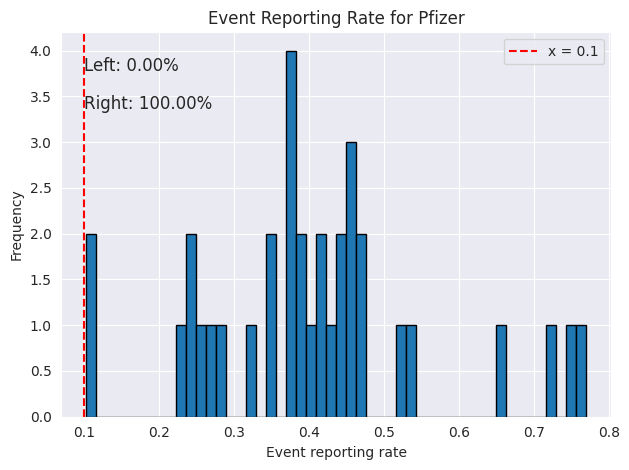

In [65]:
E_reporting_rate = []
symptom = []

query = {
    "vaccine": "COVID19",
    "manufacturer": "PFIZER\\BIONTECH",
}
results = list(col.find(query))
filtered_results = [entry for entry in results if entry['symptom'] in Pfizer_adverse_reactions]

for result in tqdm(filtered_results):
    DE = result.get("DE")
    if DE >= 3:
        dE = result.get("dE")
        De = result.get("De")
        de = result.get("de")
        
        contingency_table = [
                [DE, dE],
                [De, de]
            ]
        reporting_rate = disproportionaly_analysis.event_reporting_rate(contingency_table)
        print(reporting_rate)
        E_reporting_rate.append(reporting_rate)
        symptom.append(result.get("symptom"))
    
    
    
df = pd.DataFrame({
    'symptom': symptom,
    'manufacturer': result.get("manufacturer"),
    'E_rate': E_reporting_rate
})

# Calculate the percentages
total_values = len(df)
left_of_line = len(df[df['E_rate'] < 0.1])
right_of_line = len(df[df['E_rate'] >= 0.1])

percent_left = (left_of_line / total_values) * 100
percent_right = (right_of_line / total_values) * 100

# Create the histogram
plt.hist(df['E_rate'], bins=50, edgecolor='black')
plt.axvline(x=0.1, color='r', linestyle='--', label='x = 0.1')

# Annotate percentages
plt.text(0.1, max(plt.gca().get_ylim()) * 0.9, f'Left: {percent_left:.2f}%',  fontsize=12, horizontalalignment='left')
plt.text(0.1, max(plt.gca().get_ylim()) * 0.8, f'Right: {percent_right:.2f}%', fontsize=12, horizontalalignment='left')

plt.title('Event Reporting Rate for Pfizer')
plt.xlabel('Event reporting rate')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Pfizer_Event_reporting_rate_analysis.eps', format='eps')
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Histogram/Pfizer_Event_reporting_rate_analysis.png')
plt.show()


In [62]:
results

[{'_id': ObjectId('6619451d96bbc434e86ef9fc'),
  'vaccine': 'COVID19',
  'manufacturer': 'PFIZER\\BIONTECH',
  'symptom': 'Scan normal',
  'DE': 52,
  'dE': 138,
  'De': 944137,
  'de': 1620688},
 {'_id': ObjectId('6619452396bbc434e86efa07'),
  'vaccine': 'COVID19',
  'manufacturer': 'PFIZER\\BIONTECH',
  'symptom': 'Purulent discharge',
  'DE': 55,
  'dE': 299,
  'De': 944134,
  'de': 1620527},
 {'_id': ObjectId('6619453396bbc434e86efa26'),
  'vaccine': 'COVID19',
  'manufacturer': 'PFIZER\\BIONTECH',
  'symptom': 'Obstructive airways disorder',
  'DE': 227,
  'dE': 249,
  'De': 943962,
  'de': 1620577},
 {'_id': ObjectId('6619453b96bbc434e86efa2f'),
  'vaccine': 'COVID19',
  'manufacturer': 'PFIZER\\BIONTECH',
  'symptom': 'Intervertebral disc disorder',
  'DE': 102,
  'dE': 94,
  'De': 944087,
  'de': 1620732},
 {'_id': ObjectId('6619454296bbc434e86efa39'),
  'vaccine': 'COVID19',
  'manufacturer': 'PFIZER\\BIONTECH',
  'symptom': 'Urine alcohol test',
  'DE': 4,
  'dE': 0,
  'De': 